Import library

In [79]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as rmse
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
warnings.filterwarnings('ignore')


Load data

In [80]:
data = pd.read_csv('train.csv', sep=';', decimal='.')


Data shape


In [81]:
data.shape


(6714, 13)

data information

In [82]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [83]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [84]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [85]:
data.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5,white
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8,white
6711,6.6,0.3,0.24,3.3,0.034,29,99,0.9903,3.10,0.40,12.3,7,white
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5,white
6713,6.4,0.3,0.20,15.6,0.040,20,142,0.9962,3.10,0.54,10.6,5,white


In [86]:
display(data.iloc[2])


fixed acidity              8.4
volatile acidity           0.5
citric acid               0.35
residual sugar             2.9
chlorides                0.076
free sulfur dioxide         21
total sulfur dioxide       127
density                 0.9976
pH                        3.23
sulphates                 0.63
alcohol                    9.2
quality                      5
type                       red
Name: 2, dtype: object

In [87]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,7.251638,0.348436,0.317466,5.411871,0.057506,30.132559,114.576259,0.994789,3.219103,0.536120,10.458743,5.796098
std,1.330423,0.168505,0.148842,4.739180,0.038175,17.619884,56.417138,0.003020,0.160737,0.157877,1.189933,0.883490
min,3.800000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,28.000000,117.000000,0.995100,3.210000,0.510000,10.200000,6.000000
75%,7.700000,0.400000,0.390000,8.000000,0.068000,41.000000,155.000000,0.997100,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.300000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000


In [88]:
data.isnull().values.any()


False

In [89]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  fixed acidity  is :  0
Count of zeros in column  volatile acidity  is :  0
Count of zeros in column  citric acid  is :  158
Count of zeros in column  residual sugar  is :  0
Count of zeros in column  chlorides  is :  0
Count of zeros in column  free sulfur dioxide  is :  0
Count of zeros in column  total sulfur dioxide  is :  0
Count of zeros in column  density  is :  0
Count of zeros in column  pH  is :  0
Count of zeros in column  sulphates  is :  0
Count of zeros in column  alcohol  is :  0
Count of zeros in column  quality  is :  0
Count of zeros in column  type  is :  0


In [90]:
def handle(df):
    col = df.columns.values
    # iterate through the columns
    for c in col:
        # text_alternative hold the alternate values
        text_alternative = {}

        def convert(val):
            return text_alternative[val]
        # if the column is object type then we have to convert it to int type
        if df[c].dtype != np.int64 and df[c].dtype != np.float64:
            column_contents = df[c].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            # store the unique values in text_alternative
            for u in unique_elements:
                # set it from zero to n
                if u not in text_alternative:
                    text_alternative[u] = x
                    x += 1
            df[c] = list(map(convert, df[c]))
    return df


df = handle(data)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,1
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,0
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,0
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,1
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,1


In [91]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,7.251638,0.348436,0.317466,5.411871,0.057506,30.132559,114.576259,0.994789,3.219103,0.536120,10.458743,5.796098,0.734733
std,1.330423,0.168505,0.148842,4.739180,0.038175,17.619884,56.417138,0.003020,0.160737,0.157877,1.189933,0.883490,0.441508
min,3.800000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992400,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,28.000000,117.000000,0.995100,3.210000,0.510000,10.200000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.000000,0.068000,41.000000,155.000000,0.997100,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.300000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000,1.000000


In [92]:
'''df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
'''

'df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)\n'

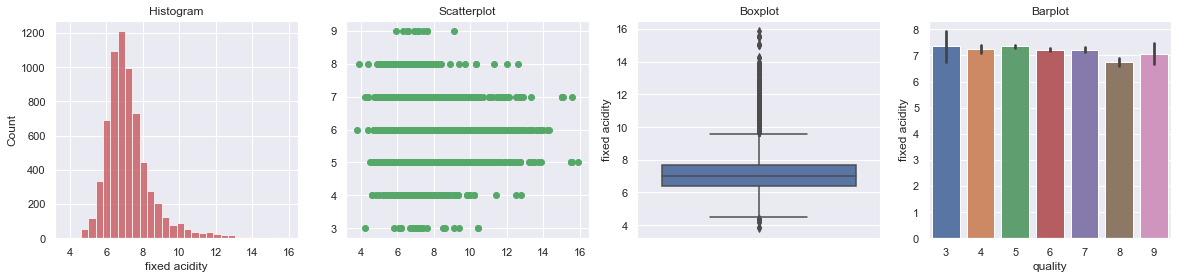

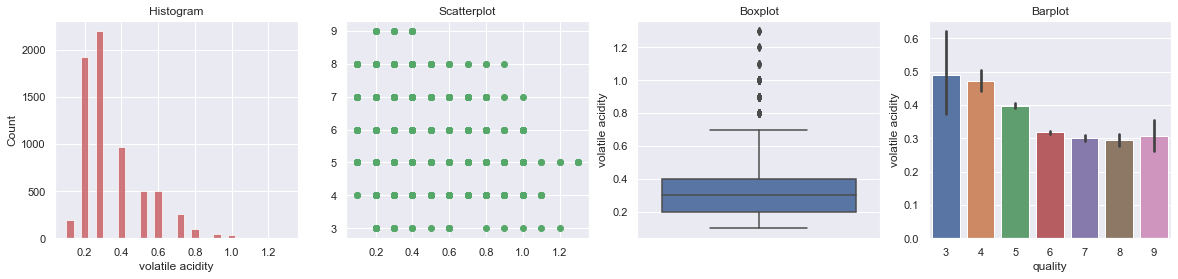

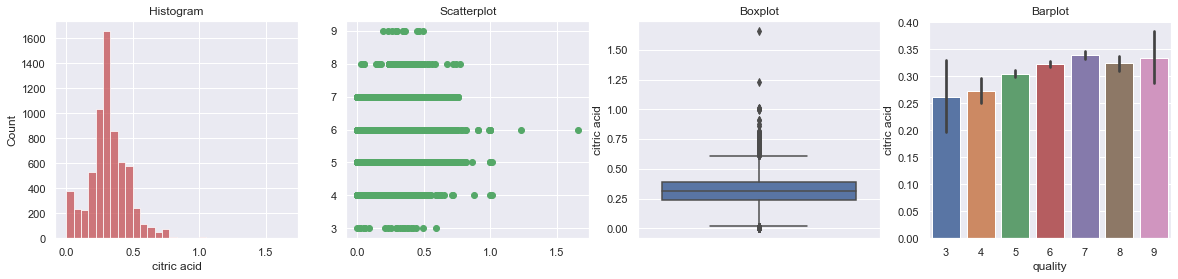

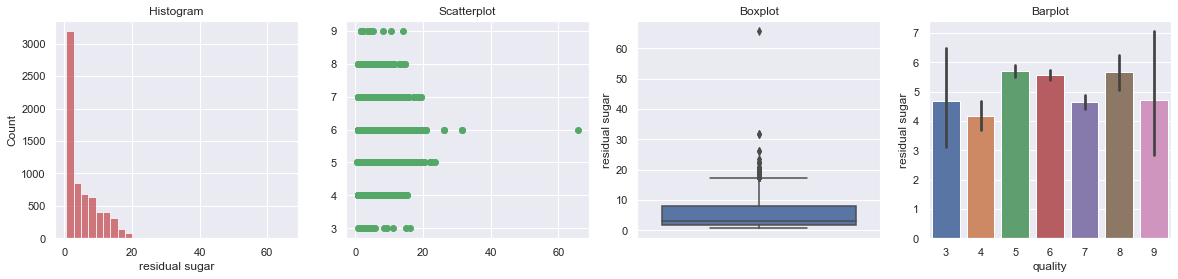

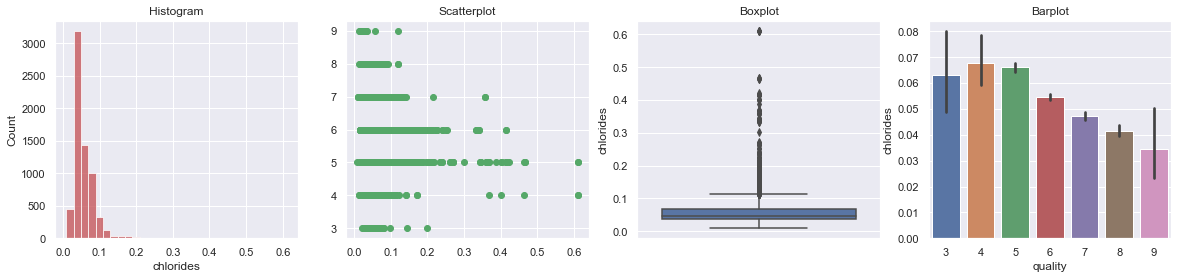

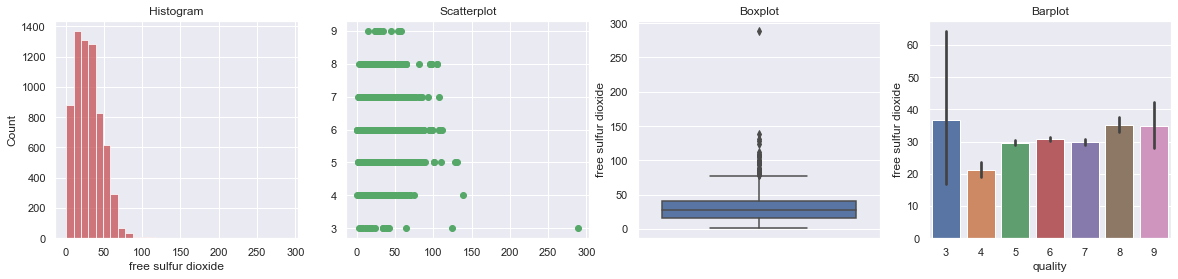

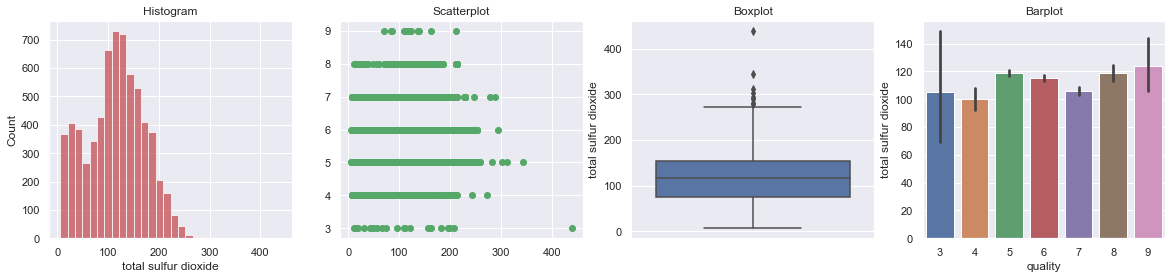

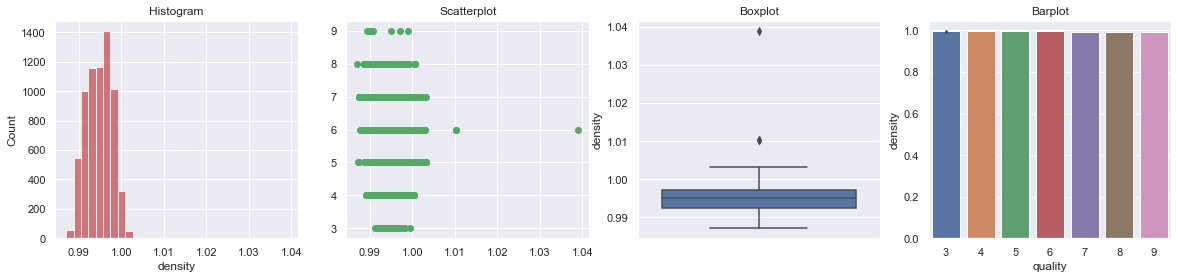

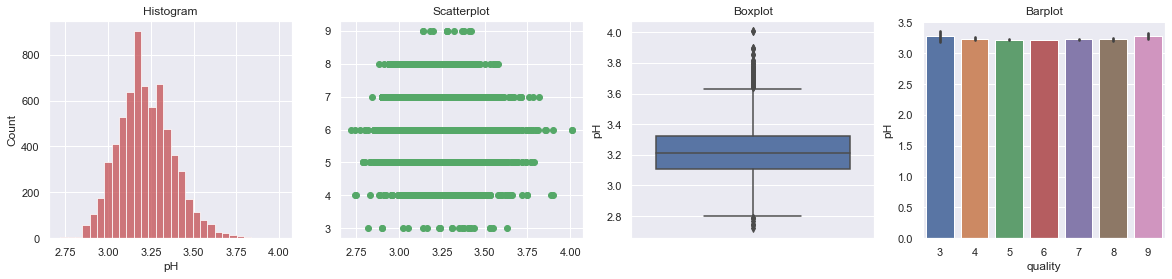

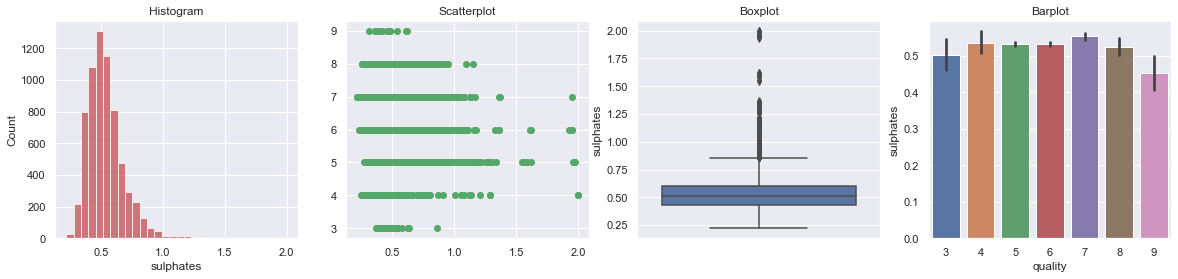

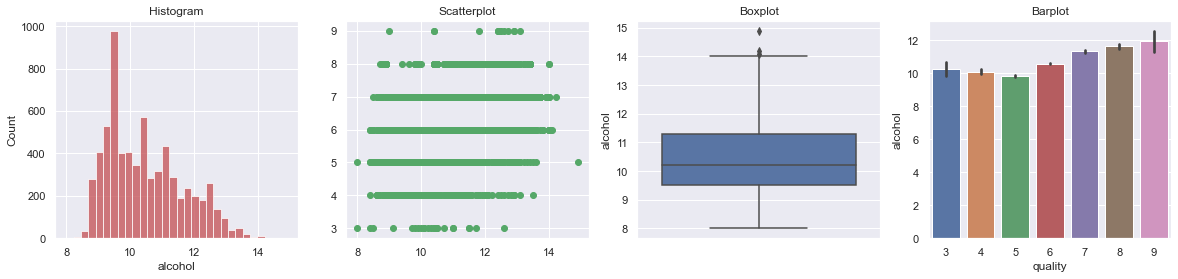

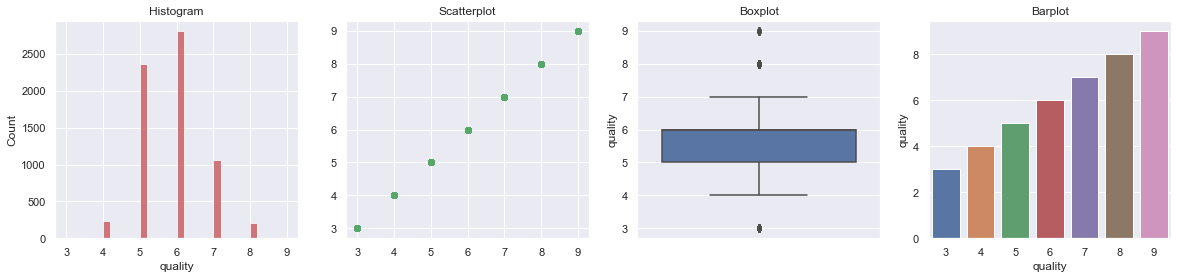

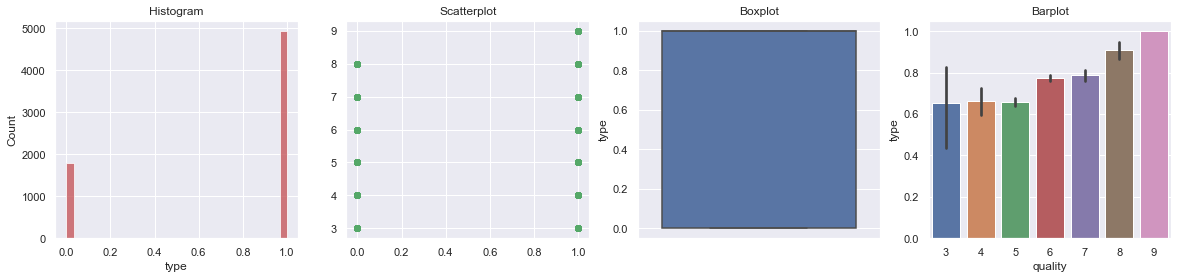

In [93]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()
for variable in df:
    diagnostic_plots(df,variable,'quality')

In [94]:
'''fg, ax2 = plt.subplots(6,2, figsize=(20, 30))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df, ax = ax2[0,0], palette = 'hls')
sns.barplot(x = 'quality', y ='volatile acidity', data = df, ax = ax2[0,1], palette = 'hls')
sns.barplot(x = 'quality', y ='citric acid', data = df, ax = ax2[1,0], palette = 'hls')
sns.barplot(x = 'quality', y ='residual sugar', data = df, ax = ax2[1,1], palette = 'hls')
sns.barplot(x = 'quality', y ='chlorides', data = df, ax = ax2[2,0], palette = 'hls')
sns.barplot(x = 'quality', y ='free sulfur dioxide', data = df, ax = ax2[2,1], palette = 'hls')
sns.barplot(x = 'quality', y ='total sulfur dioxide', data = df, ax = ax2[3,0], palette = 'hls')
sns.barplot(x = 'quality', y ='density', data = df, ax = ax2[3,1], palette = 'hls')
sns.barplot(x = 'quality', y ='pH', data = df, ax = ax2[4,0], palette = 'hls')
sns.barplot(x = 'quality', y ='sulphates', data = df, ax = ax2[4,1], palette = 'hls')
sns.barplot(x = 'quality', y ='alcohol', data = df, ax = ax2[5,0], palette = 'hls')
sns.barplot(x = 'quality', y ='type', data = df, ax = ax2[5,1], palette = 'hls')'''


"fg, ax2 = plt.subplots(6,2, figsize=(20, 30))\nsns.barplot(x = 'quality', y = 'fixed acidity', data = df, ax = ax2[0,0], palette = 'hls')\nsns.barplot(x = 'quality', y ='volatile acidity', data = df, ax = ax2[0,1], palette = 'hls')\nsns.barplot(x = 'quality', y ='citric acid', data = df, ax = ax2[1,0], palette = 'hls')\nsns.barplot(x = 'quality', y ='residual sugar', data = df, ax = ax2[1,1], palette = 'hls')\nsns.barplot(x = 'quality', y ='chlorides', data = df, ax = ax2[2,0], palette = 'hls')\nsns.barplot(x = 'quality', y ='free sulfur dioxide', data = df, ax = ax2[2,1], palette = 'hls')\nsns.barplot(x = 'quality', y ='total sulfur dioxide', data = df, ax = ax2[3,0], palette = 'hls')\nsns.barplot(x = 'quality', y ='density', data = df, ax = ax2[3,1], palette = 'hls')\nsns.barplot(x = 'quality', y ='pH', data = df, ax = ax2[4,0], palette = 'hls')\nsns.barplot(x = 'quality', y ='sulphates', data = df, ax = ax2[4,1], palette = 'hls')\nsns.barplot(x = 'quality', y ='alcohol', data = df,

In [95]:
'''sns.pairplot(df, hue='quality', diag_kind='kde', palette='hls', corner=True)'''


"sns.pairplot(df, hue='quality', diag_kind='kde', palette='hls', corner=True)"

In [96]:
'''plt.figure(figsize=(16,11))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='inferno')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);'''


"plt.figure(figsize=(16,11))\nheatmap = sns.heatmap(data.corr(), annot=True, cmap='inferno')\nheatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);"

split into train and test set

In [97]:
testcsv = pd.read_csv('test.csv', sep=';', decimal='.')


In [98]:
testcsv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    820 non-null    int64  
 1   fixed acidity         820 non-null    float64
 2   volatile acidity      820 non-null    float64
 3   citric acid           820 non-null    float64
 4   residual sugar        820 non-null    float64
 5   chlorides             820 non-null    float64
 6   free sulfur dioxide   820 non-null    float64
 7   total sulfur dioxide  820 non-null    float64
 8   density               820 non-null    float64
 9   pH                    820 non-null    float64
 10  sulphates             820 non-null    float64
 11  alcohol               820 non-null    float64
 12  type                  820 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 83.4+ KB


In [99]:
new_test = handle(testcsv.drop(labels='id', axis=1))


In [100]:
new_test.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,0
1,8.2,0.27,0.39,7.8,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,1
2,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,1
3,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,1
4,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,1


In [101]:
'''res = pd.DataFrame(columns = ['quality'], data = DT.predict(new_test))
res.insert(0, "id", testcsv['id'], True)
res.head()

print()'''

'res = pd.DataFrame(columns = [\'quality\'], data = DT.predict(new_test))\nres.insert(0, "id", testcsv[\'id\'], True)\nres.head()\n\nprint()'

In [102]:
'''scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)'''


'scaler = StandardScaler()\nscaled_df = scaler.fit_transform(df)'

In [103]:
'''X = df.drop(labels='quality', axis=1).values
Y = df['quality'].values
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)
'''

"X = df.drop(labels='quality', axis=1).values\nY = df['quality'].values\nx_train, x_test, y_train, y_test = train_test_split(\n    X, Y, test_size=0.25, random_state=42)\n"

In [104]:
'''from sklearn.model_selection import GridSearchCV
params_dict = {'C': [0.001, 0.01, 0.1, 1,
                     10, 100, 1000], 'penalty': ['l1', 'l2']}
clf_lr = GridSearchCV(estimator=LogisticRegression(),
                      param_grid=params_dict, scoring='accuracy', cv=10)
clf_lr.fit(x_train, y_train)
'''

"from sklearn.model_selection import GridSearchCV\nparams_dict = {'C': [0.001, 0.01, 0.1, 1,\n                     10, 100, 1000], 'penalty': ['l1', 'l2']}\nclf_lr = GridSearchCV(estimator=LogisticRegression(),\n                      param_grid=params_dict, scoring='accuracy', cv=10)\nclf_lr.fit(x_train, y_train)\n"

In [105]:
'''clf_lr.best_params_'''


'clf_lr.best_params_'

In [106]:
'''clf_lr.best_score_
'''

'clf_lr.best_score_\n'

In [107]:
'''pred = clf_lr.predict(x_test)
accuracy_score(pred, y_test)
'''

'pred = clf_lr.predict(x_test)\naccuracy_score(pred, y_test)\n'

In [108]:
'''clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)'''

"clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))\nclf_gb.fit(x_train,y_train)\npred=clf_gb.predict(x_test)\naccuracy_score(pred,y_test)"

In [109]:
'''res = pd.DataFrame(columns = ['quality'], data = clf_gb.predict(new_test))  
testcsv["id"].head()'''


'res = pd.DataFrame(columns = [\'quality\'], data = clf_gb.predict(new_test))  \ntestcsv["id"].head()'

In [110]:
'''res.insert(0, "id", testcsv['id'], True)

res.to_csv('submission.csv', index=False)'''

'res.insert(0, "id", testcsv[\'id\'], True)\n\nres.to_csv(\'submission.csv\', index=False)'

In [111]:
'''res.tail()'''

'res.tail()'

In [112]:
cols = df.select_dtypes('number').columns
df_sub = df.loc[:,cols]
iqr = df_sub.quantile(0.75, numeric_only=False) - df_sub.quantile(0.25, numeric_only=False)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
df.loc[:, cols] = df_sub.where(lim, np.nan)
df.dropna(subset=cols, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5518 non-null   float64
 1   volatile acidity      5518 non-null   float64
 2   citric acid           5518 non-null   float64
 3   residual sugar        5518 non-null   float64
 4   chlorides             5518 non-null   float64
 5   free sulfur dioxide   5518 non-null   float64
 6   total sulfur dioxide  5518 non-null   float64
 7   density               5518 non-null   float64
 8   pH                    5518 non-null   float64
 9   sulphates             5518 non-null   float64
 10  alcohol               5518 non-null   float64
 11  quality               5518 non-null   float64
 12  type                  5518 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 603.5 KB


In [114]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6709,7.2,0.2,0.19,7.7,0.045,53.0,176.0,0.9958,3.17,0.38,9.5,5.0,1
6710,6.7,0.3,0.34,7.5,0.036,39.0,124.0,0.9912,2.99,0.32,12.4,8.0,1
6711,6.6,0.3,0.24,3.3,0.034,29.0,99.0,0.9903,3.10,0.40,12.3,7.0,1
6712,8.0,0.2,0.31,5.6,0.049,24.0,97.0,0.9930,3.10,0.42,10.9,5.0,1
6713,6.4,0.3,0.20,15.6,0.040,20.0,142.0,0.9962,3.10,0.54,10.6,5.0,1


In [115]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000,5518.000000
mean,7.011653,0.326441,0.302854,5.296557,0.050001,30.861182,119.258065,0.994289,3.219625,0.511609,10.520424,5.827836,0.800652
std,0.907536,0.141147,0.120222,4.314040,0.018684,16.196196,52.637533,0.002764,0.152010,0.118574,1.183126,0.862323,0.399546
min,4.400000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.790000,0.220000,8.400000,4.000000,0.000000
25%,6.400000,0.200000,0.250000,1.800000,0.037000,18.000000,87.000000,0.992000,3.110000,0.420000,9.500000,5.000000,1.000000
50%,6.900000,0.300000,0.300000,3.200000,0.046000,29.000000,120.000000,0.994400,3.210000,0.500000,10.400000,6.000000,1.000000
75%,7.500000,0.400000,0.370000,8.100000,0.057000,42.000000,155.000000,0.996600,3.330000,0.580000,11.300000,6.000000,1.000000
max,9.800000,0.700000,0.640000,16.700000,0.114000,83.000000,282.000000,1.001700,3.670000,0.880000,14.000000,8.000000,1.000000


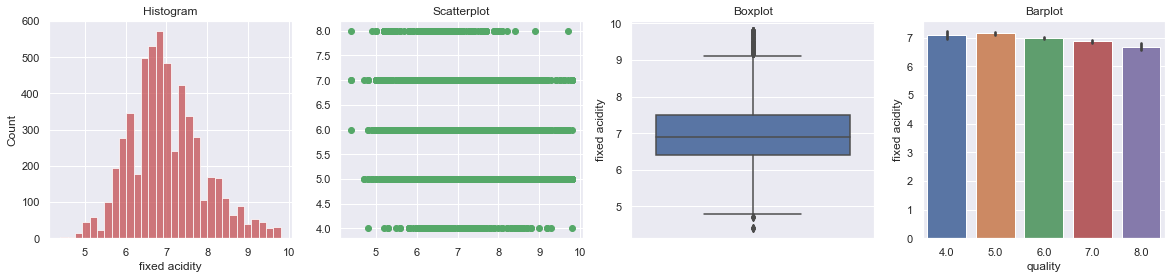

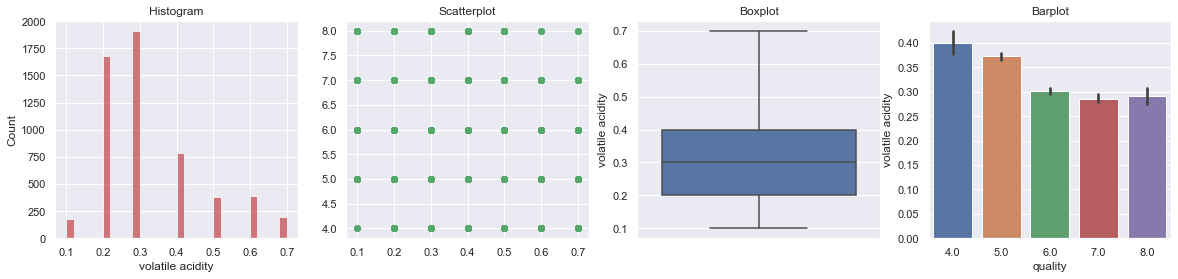

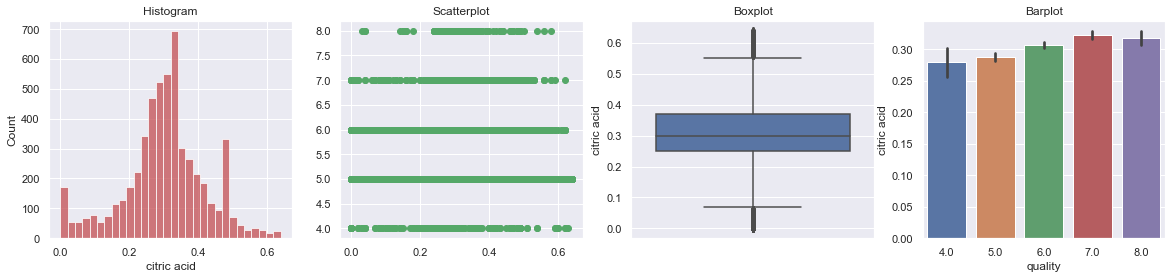

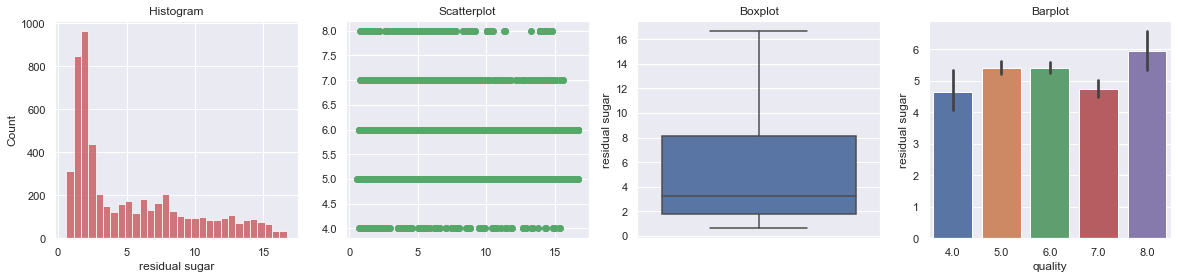

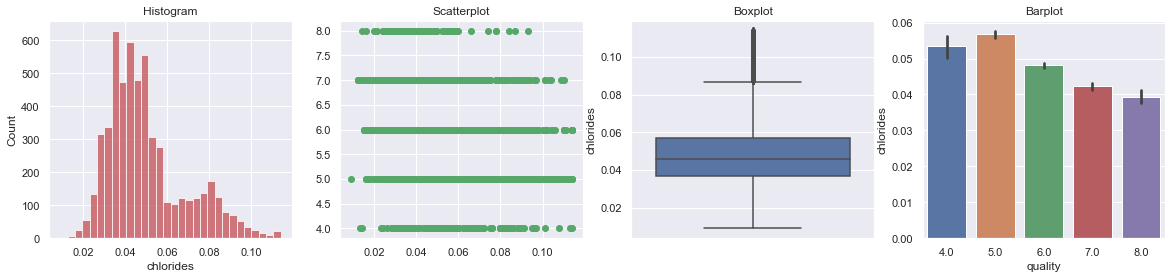

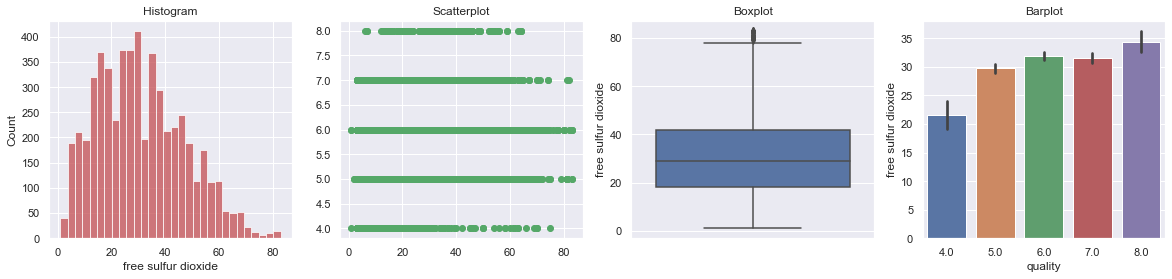

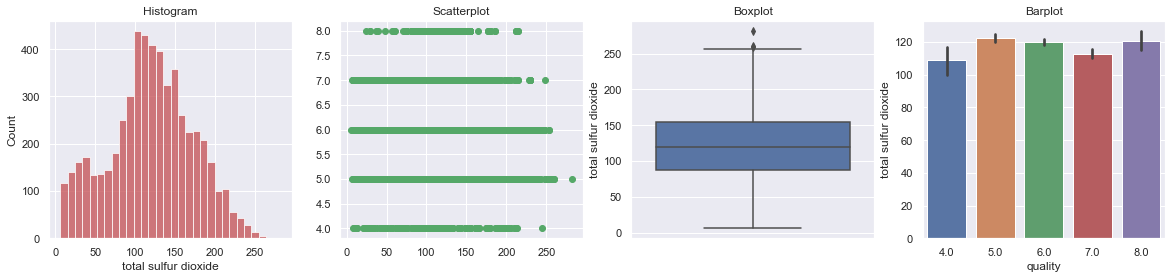

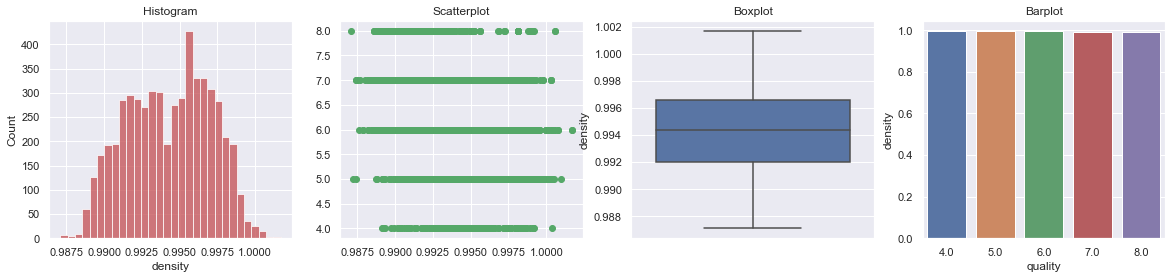

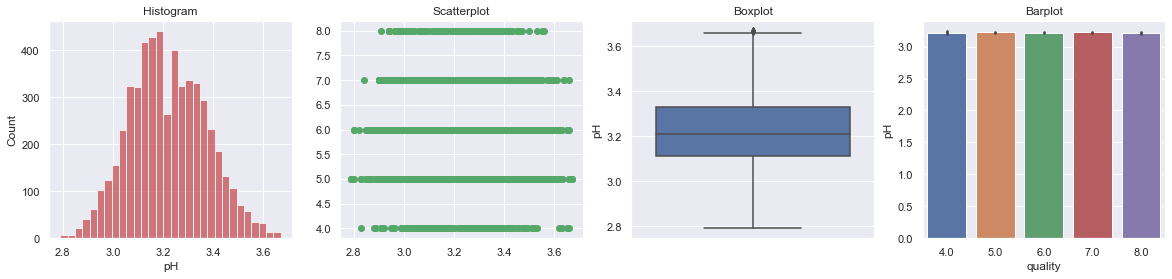

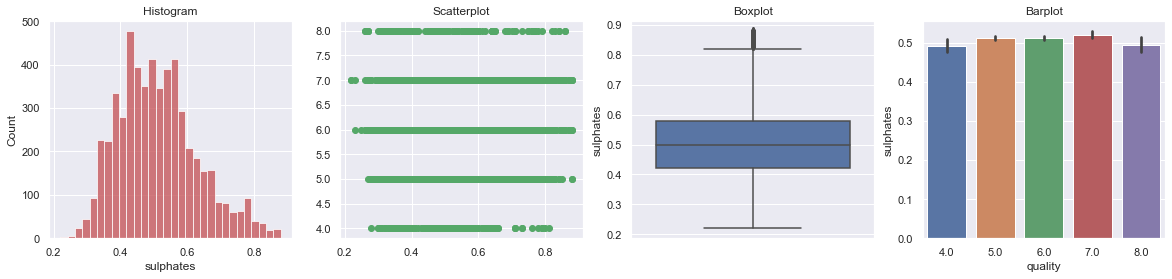

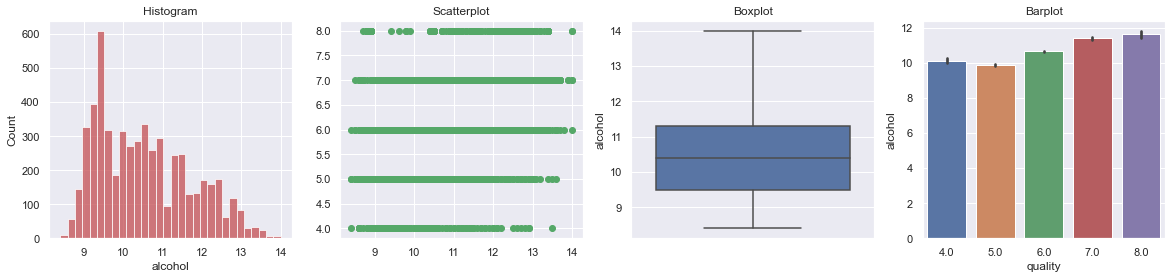

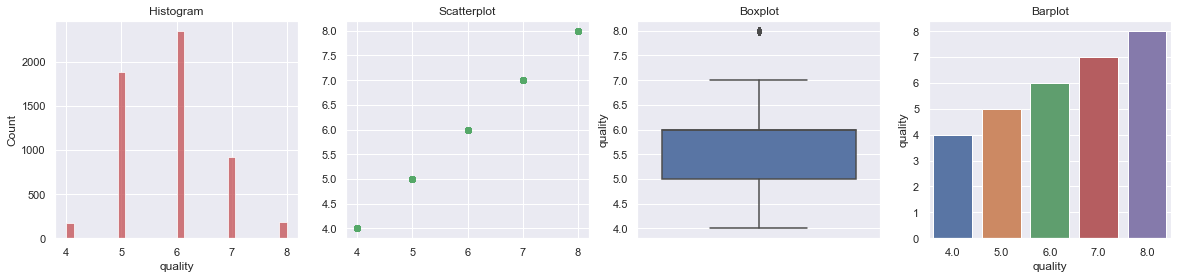

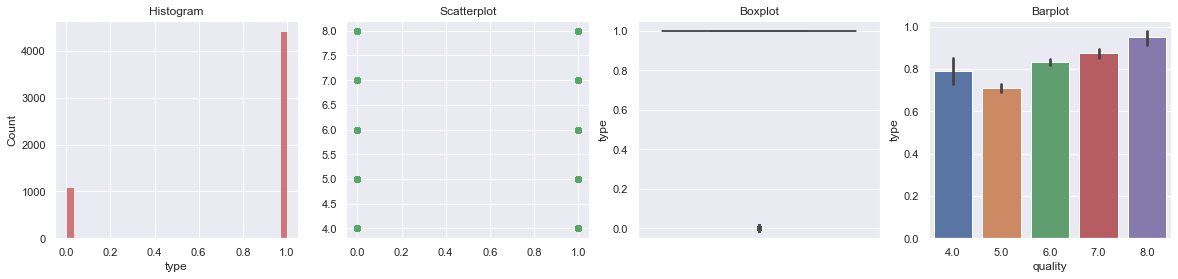

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [116]:

[diagnostic_plots(df,variable,'quality') for variable in df]

In [118]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X = df.drop(labels='quality', axis=1)
Y = df['quality']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [119]:
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

KeyboardInterrupt: 